# Liver Disease Prediction

## Introduction

This notebook aims to predict liver disease using various machine learning techniques, including data preprocessing, exploratory data analysis (EDA), model training, and the use of explainable AI (XAI) methods to interpret model predictions.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=UserWarning)
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, PrecisionRecallDisplay, RocCurveDisplay

In [24]:
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Liver_Patient_Dataset_(LPD)_train.csv")
print(df)
df.info()

       Age of the patient Gender of the patient  Total Bilirubin  \
0                    65.0                Female              0.7   
1                    62.0                  Male             10.9   
2                    62.0                  Male              7.3   
3                    58.0                  Male              1.0   
4                    72.0                  Male              3.9   
...                   ...                   ...              ...   
30686                50.0                  Male              2.2   
30687                55.0                  Male              2.9   
30688                54.0                  Male              6.8   
30689                48.0                Female              1.9   
30690                30.0                  Male              3.1   

       Direct Bilirubin  Alkphos Alkaline Phosphotase  \
0                   0.1                         187.0   
1                   5.5                         699.0   
2           

## Exploratory Data Analysis (EDA)

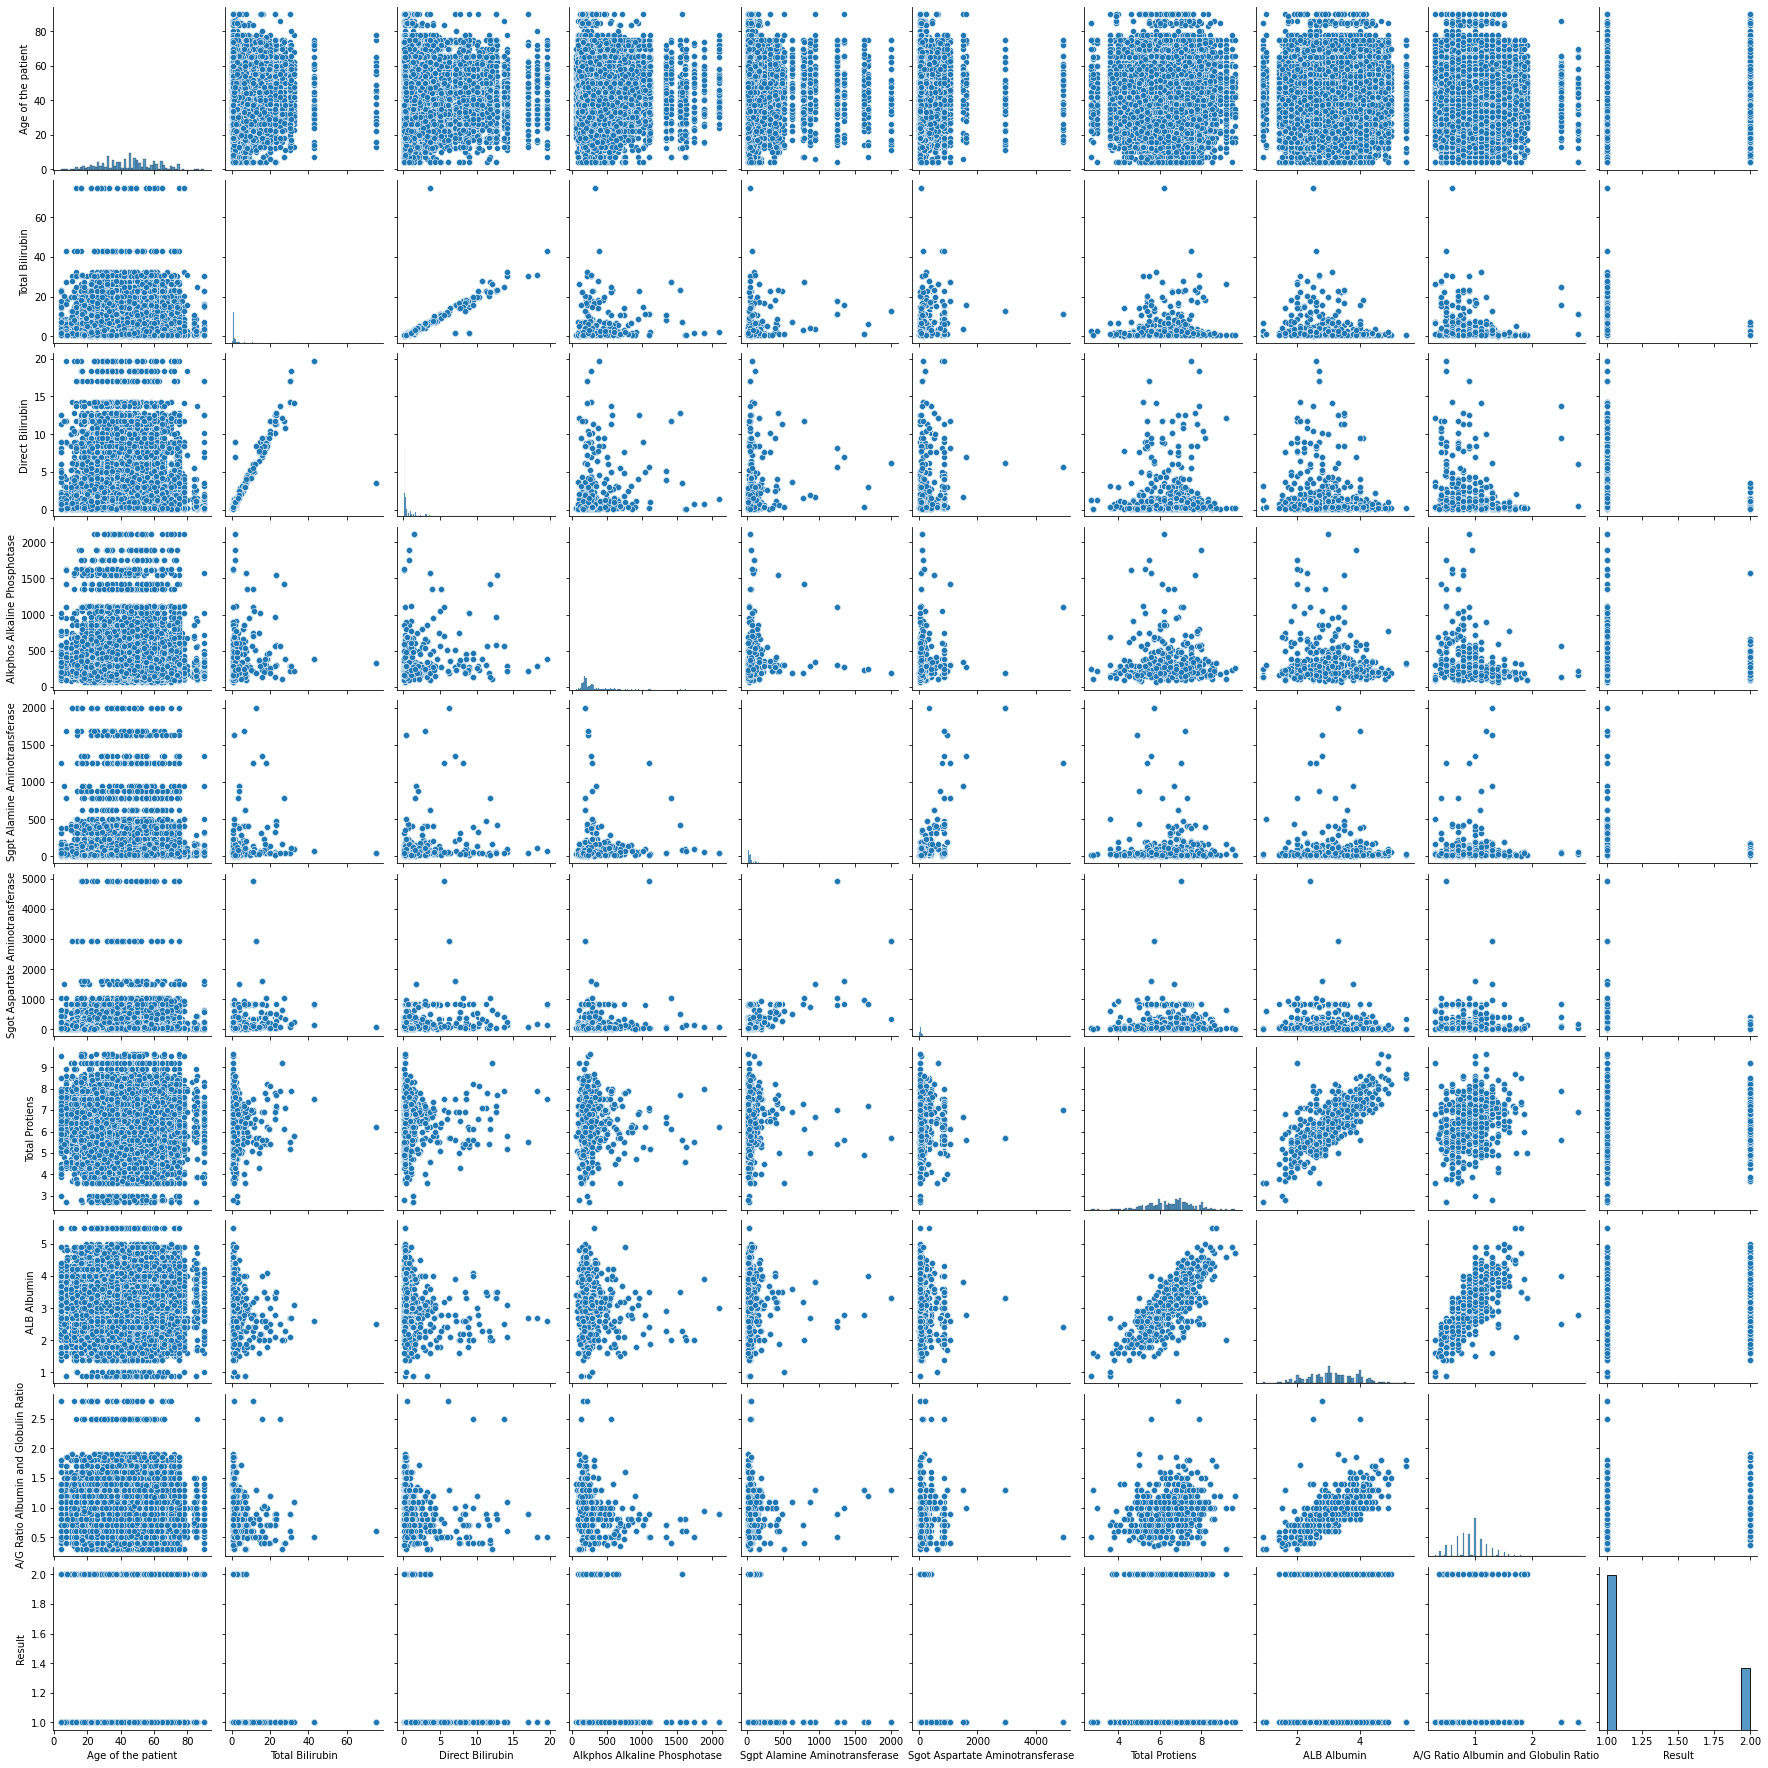

In [3]:
sns.pairplot(df);

In [4]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['Gender of the patient']

In [5]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['Age of the patient',
 'Total Bilirubin',
 'Direct Bilirubin',
 'Alkphos Alkaline Phosphotase',
 'Sgpt Alamine Aminotransferase',
 'Sgot Aspartate Aminotransferase',
 'Total Protiens',
 'ALB Albumin',
 'A/G Ratio Albumin and Globulin Ratio',
 'Result']

## Data Cleaning and Preprocessing

In [6]:
#check for duplicates
print("duplicate rows check:") 
# Check for duplicate rows
duplicate_rows = df.duplicated()
# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)

duplicate rows check:
Number of duplicate rows: 11323


In [7]:
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19368 entries, 0 to 30689
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    19367 non-null  float64
 1   Gender of the patient                 18572 non-null  object 
 2   Total Bilirubin                       18811 non-null  float64
 3   Direct Bilirubin                      18878 non-null  float64
 4   Alkphos Alkaline Phosphotase          18674 non-null  float64
 5   Sgpt Alamine Aminotransferase         18909 non-null  float64
 6   Sgot Aspartate Aminotransferase       18975 non-null  float64
 7   Total Protiens                        18998 non-null  float64
 8   ALB Albumin                           18955 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  18932 non-null  float64
 10  Result                                19368 non-null  int64  
dtypes: float64(9), 

In [8]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df['Gender of the patient']=enc.fit_transform(df['Gender of the patient'])

In [9]:
df['Result'] = df['Result'].map({2:1,1:0})

In [10]:
df['Result'].value_counts()

0    13811
1     5557
Name: Result, dtype: int64

In [11]:
df.rename(columns={
    'Age of the patient': 'Age',
    'Gender of the patient': 'Gender',
    'Alkphos Alkaline Phosphotase': 'Alkaline Phosphotase',
    'Sgpt Alamine Aminotransferase': 'Alamine Aminotransferase',
    'Sgot Aspartate Aminotransferase': 'Aspartate Aminotransferase',
    'A/G Ratio Albumin and Globulin Ratio': 'A/G Ratio',
    'ALB Albumin': 'Albumin'
}, inplace=True)

df


,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine Aminotransferase,Aspartate Aminotransferase,Total Protiens,Albumin,A/G Ratio,Result
0,65.0,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,0
1,62.0,1,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,0
2,62.0,1,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,0
3,58.0,1,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,0
4,72.0,1,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,0
...,...,...,...,...,...,...,...,...,...,...,...
29974,58.0,1,2.9,1.3,482.0,22.0,34.0,7.0,2.4,0.50,0
29976,28.0,1,1.9,1.0,231.0,16.0,55.0,4.3,1.6,0.60,0
30686,50.0,1,2.2,1.0,610.0,17.0,28.0,7.3,2.6,0.55,0
30688,54.0,1,6.8,3.0,542.0,116.0,66.0,6.4,3.1,0.90,0


In [12]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 

In [13]:
# # Replace '\t?' with NaN
# X.replace('\t?', float('nan'), inplace=True)

## Handling Missing Values

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()
imputer.fit(X)
X = imputer.transform(X)
print(X)

[[65.    0.    0.7  ...  6.8   3.3   0.9 ]
 [62.    1.   10.9  ...  7.5   3.2   0.74]
 [62.    1.    7.3  ...  7.    3.3   0.89]
 ...
 [50.    1.    2.2  ...  7.3   2.6   0.55]
 [54.    1.    6.8  ...  6.4   3.1   0.9 ]
 [48.    0.    1.9  ...  4.3   1.6   0.6 ]]


In [15]:
#check NaN values
nan_value = np.isnan(X).sum()
print(nan_value)

0


In [16]:
print(X.shape)

(19368, 10)


In [17]:
print(y.shape)

(19368,)


## Feature Scaling

In [18]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

def scaling(X):
    # Perform robust scaling
    robust_scaler = RobustScaler()
    data_robust_scaled = robust_scaler.fit_transform(X)
    # Perform standard scaling
    standard_scaler = StandardScaler()
    data_standard_scaled = standard_scaler.fit_transform(data_robust_scaled)
    # Perform MinMax scaling
    minmax_scaler = MinMaxScaler()
    data_scaled = minmax_scaler.fit_transform(data_standard_scaled)
    return data_scaled
scaled_data = scaling(X)
print(scaled_data)


[[0.70930233 0.         0.02469307 ... 0.5942029  0.53826836 0.36021555]
 [0.6744186  0.5        0.15858447 ... 0.69565217 0.51728056 0.30633896]
 [0.6744186  0.5        0.11132868 ... 0.62318841 0.53826836 0.35684826]
 ...
 [0.53488372 0.5        0.04438298 ... 0.66666667 0.39135375 0.24236052]
 [0.58139535 0.5        0.10476538 ... 0.53623188 0.49629276 0.36021555]
 [0.51162791 0.         0.040445   ... 0.23188406 0.18147573 0.25919695]]


In [19]:
print(scaled_data.shape)

(19368, 10)


In [20]:
column_names = df.columns[:-1]
DF = pd.DataFrame(scaled_data, columns=column_names)
print(DF)

            Age  Gender  Total Bilirubin  Direct Bilirubin  \
0      0.709302     0.0         0.024693          0.033319   
1      0.674419     0.5         0.158584          0.299650   
2      0.674419     0.5         0.111329          0.230601   
3      0.627907     0.5         0.028631          0.048115   
4      0.790698     0.5         0.066698          0.127028   
...         ...     ...              ...               ...   
19363  0.627907     0.5         0.053572          0.092504   
19364  0.279070     0.5         0.040445          0.077708   
19365  0.534884     0.5         0.044383          0.077708   
19366  0.581395     0.5         0.104765          0.176348   
19367  0.511628     0.0         0.040445          0.077708   

       Alkaline Phosphotase  Alamine Aminotransferase  \
0                  0.060576                  0.028181   
1                  0.310699                  0.051693   
2                  0.208598                  0.049734   
3                  0.058134

In [21]:
def perform(y_true, y_pred):
    print("Precision : ", precision_score(y_true, y_pred))
    print("Recall : ", recall_score(y_true, y_pred))
    print("Accuracy : ", accuracy_score(y_true, y_pred))
    print("F1 Score : ", f1_score(y_true, y_pred))
    print("ROC-AUC Score : ", roc_auc_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\n")

In [22]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(DF, y, test_size=0.3, random_state=42)

## Handle data imbalance

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', k_neighbors=10, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

## Model Training and Evaluation

## Naive Bayes

In [25]:
gauss_nb = GaussianNB()

# Fit the model on training data
gauss_nb.fit(X_train, y_train)

# Make predictions on both training and test data
y_pred_train_nb = gauss_nb.predict(X_train)
y_pred_test_nb = gauss_nb.predict(X_test)

In [26]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_nb)

Training Data Evaluation:
Precision :  0.6193136472466081
Recall :  0.9613875696882098
Accuracy :  0.68521577534586
F1 Score :  0.7533371086481676
ROC-AUC Score :  0.6852157753458601

Confusion Matrix:
 [[3962 5724]
 [ 374 9312]]




In [27]:
print(classification_report(y_train, y_pred_train_nb))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57      9686
           1       0.62      0.96      0.75      9686

    accuracy                           0.69     19372
   macro avg       0.77      0.69      0.66     19372
weighted avg       0.77      0.69      0.66     19372



In [28]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_nb)

Test Data Evaluation:
Precision :  0.3928921568627451
Recall :  0.9507710557532622
Accuracy :  0.5594562037515057
F1 Score :  0.5560180367672563
ROC-AUC Score :  0.6751431036342068

Confusion Matrix:
 [[1648 2477]
 [  83 1603]]




In [29]:
print(classification_report(y_test, y_pred_test_nb))

              precision    recall  f1-score   support

           0       0.95      0.40      0.56      4125
           1       0.39      0.95      0.56      1686

    accuracy                           0.56      5811
   macro avg       0.67      0.68      0.56      5811
weighted avg       0.79      0.56      0.56      5811



In [30]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
nb_scores = cross_validate(gauss_nb, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in nb_scores.items() if 'test_' in metric}
print("Average scores of testing data for Naive Bayes:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Naive Bayes:
Precision: 0.3910414337068503
Recall: 0.9531420645093321
Accuracy: 0.55532726656534
F1: 0.5544656160105521
Roc_auc: 0.7300120152236108


In [31]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
nb_scores = cross_validate(gauss_nb, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in nb_scores.items() if 'test_' in metric}
print("Average scores of traning data for Naive Bayes:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for Naive Bayes:
Precision: 0.6191074688213254
Recall: 0.9619047999603613
Accuracy: 0.6850093560044631
F1: 0.7533162789713452
Roc_auc: 0.756788439098163


## Decision Tree

In [32]:
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

decision_tree = DecisionTreeClassifier()

random_search = RandomizedSearchCV(decision_tree, param_grid_decision_tree, cv=5, n_iter=10)

random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_dt = random_search.best_params_
best_model_dt = random_search.best_estimator_

# Fit the model on training data
best_model_dt.fit(X_train, y_train)

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_dt)
print("Best Model:")
print(best_model_dt)

# Make predictions on both training and test data
y_pred_train_dt = best_model_dt.predict(X_train)
y_pred_test_dt = best_model_dt.predict(X_test)

Best Parameters:
{'splitter': 'random', 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}
Best Model:
DecisionTreeClassifier(criterion='entropy', min_samples_split=5,
                       splitter='random')


In [33]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_dt)

Training Data Evaluation:
Precision :  0.9980321077162092
Recall :  0.9948379103861243
Accuracy :  0.9964381581664258
F1 Score :  0.9964324492011788
ROC-AUC Score :  0.9964381581664258

Confusion Matrix:
 [[9667   19]
 [  50 9636]]




In [34]:
print(classification_report(y_train, y_pred_train_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9686
           1       1.00      0.99      1.00      9686

    accuracy                           1.00     19372
   macro avg       1.00      1.00      1.00     19372
weighted avg       1.00      1.00      1.00     19372



In [35]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_dt)

Test Data Evaluation:
Precision :  0.9573241061130334
Recall :  0.9845788849347569
Accuracy :  0.9827912579590432
F1 Score :  0.9707602339181287
ROC-AUC Score :  0.9833197454976816

Confusion Matrix:
 [[4051   74]
 [  26 1660]]




In [36]:
print(classification_report(y_test, y_pred_test_dt))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4125
           1       0.96      0.98      0.97      1686

    accuracy                           0.98      5811
   macro avg       0.98      0.98      0.98      5811
weighted avg       0.98      0.98      0.98      5811



In [37]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
dt_scores = cross_validate(best_model_dt, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in dt_scores.items() if 'test_' in metric}
print("Average scores of testing data for Decision Tree:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Decision Tree:
Precision: 0.9746784726671545
Recall: 0.9578793039874984
Accuracy: 0.9805535864129655
F1: 0.9661617452398004
Roc_auc: 0.9774317845283378


In [38]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
dt_scores = cross_validate(best_model_dt, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in dt_scores.items() if 'test_' in metric}
print("Average scores of traning data for Decision Tree:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for Decision Tree:
Precision: 0.9824366863649452
Recall: 0.9710913379290798
Accuracy: 0.9768730894132929
F1: 0.9767102240266876
Roc_auc: 0.9799855917056659


## Logistic Regression

In [39]:
param_grid_logreg = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
}

logreg = LogisticRegression()

random_search = RandomizedSearchCV(logreg, param_grid_logreg, cv=5, n_iter=10)

random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_lr = random_search.best_params_
best_model_lr = random_search.best_estimator_

# Fit the model on training data
best_model_lr.fit(X_train, y_train)

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_lr)
print("Best Model:")
print(best_model_lr)

# Make predictions on both training and test data
y_pred_train_lr = best_model_lr.predict(X_train)
y_pred_test_lr = best_model_lr.predict(X_test)

Best Parameters:
{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}
Best Model:
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


In [40]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_lr)

Training Data Evaluation:
Precision :  0.663240068016695
Recall :  0.8859178195333471
Accuracy :  0.7180466652901094
F1 Score :  0.7585749646393212
ROC-AUC Score :  0.7180466652901094

Confusion Matrix:
 [[5329 4357]
 [1105 8581]]




In [41]:
print(classification_report(y_train, y_pred_train_lr))

              precision    recall  f1-score   support

           0       0.83      0.55      0.66      9686
           1       0.66      0.89      0.76      9686

    accuracy                           0.72     19372
   macro avg       0.75      0.72      0.71     19372
weighted avg       0.75      0.72      0.71     19372



In [42]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_lr)

Test Data Evaluation:
Precision :  0.43008536944362674
Recall :  0.8665480427046264
Accuracy :  0.6281190844949234
F1 Score :  0.5748573676962423
ROC-AUC Score :  0.6986073546856464

Confusion Matrix:
 [[2189 1936]
 [ 225 1461]]




In [43]:
print(classification_report(y_test, y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.91      0.53      0.67      4125
           1       0.43      0.87      0.57      1686

    accuracy                           0.63      5811
   macro avg       0.67      0.70      0.62      5811
weighted avg       0.77      0.63      0.64      5811



In [44]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
lr_scores = cross_validate(best_model_lr, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in lr_scores.items() if 'test_' in metric}
print("Average scores of testing data for Logistic Regression:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Logistic Regression:
Precision: 0.0
Recall: 0.0
Accuracy: 0.7096885761939788
F1: 0.0
Roc_auc: 0.7371568209618884


In [45]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
lr_scores = cross_validate(best_model_lr, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in lr_scores.items() if 'test_' in metric}
print("Average scores of traning data for Logistic Regression:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for Logistic Regression:
Precision: 0.6604989058160717
Recall: 0.8899460455323069
Accuracy: 0.7162404250004164
F1: 0.7581967482787507
Roc_auc: 0.7649183230880944


## Bagging Classifier

In [46]:
bagging_classifier = BaggingClassifier(random_state=1)

# Fit the model on training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on both training and test data
y_pred_train_bc = bagging_classifier.predict(X_train)
y_pred_test_bc = bagging_classifier.predict(X_test)

In [47]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_bc)

Training Data Evaluation:
Precision :  1.0
Recall :  0.9988643402849473
Accuracy :  0.9994321701424737
F1 Score :  0.9994318475285368
ROC-AUC Score :  0.9994321701424737

Confusion Matrix:
 [[9686    0]
 [  11 9675]]




In [48]:
print(classification_report(y_train, y_pred_train_bc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9686
           1       1.00      1.00      1.00      9686

    accuracy                           1.00     19372
   macro avg       1.00      1.00      1.00     19372
weighted avg       1.00      1.00      1.00     19372



In [49]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_bc)

Test Data Evaluation:
Precision :  0.9747800586510263
Recall :  0.9857651245551602
Accuracy :  0.988470142832559
F1 Score :  0.9802418165732822
ROC-AUC Score :  0.9876704410654589

Confusion Matrix:
 [[4082   43]
 [  24 1662]]




In [50]:
print(classification_report(y_test, y_pred_test_bc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4125
           1       0.97      0.99      0.98      1686

    accuracy                           0.99      5811
   macro avg       0.98      0.99      0.99      5811
weighted avg       0.99      0.99      0.99      5811



In [51]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
bc_scores = cross_validate(bagging_classifier, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in bc_scores.items() if 'test_' in metric}
print("Average scores of testing data for Bagging Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Bagging Classifier:
Precision: 0.9860691482015571
Recall: 0.9650027215423244
Accuracy: 0.9858886226640994
F1: 0.975411001085887
Roc_auc: 0.9953311348166405


In [52]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
bc_scores = cross_validate(bagging_classifier, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in bc_scores.items() if 'test_' in metric}
print("Average scores of traning data for Bagging Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for Bagging Classifier:
Precision: 0.9917763742749084
Recall: 0.984099921521743
Accuracy: 0.9879719419787832
F1: 0.9879185017064263
Roc_auc: 0.9979718543165783


## K Neighbors Classifier

In [53]:

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'leaf_size': [20, 30, 40],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
# Create an instance of the KNeighborsClassifier
knn = KNeighborsClassifier()

# Perform grid search to find the optimal parameters
grid_search = RandomizedSearchCV(knn, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_knn = grid_search.best_params_
best_model_knn = grid_search.best_estimator_

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_knn)
print("\nBest Model:")
print(best_model_knn)


Best Parameters:
{'weights': 'uniform', 'p': 2, 'n_neighbors': 3, 'metric': 'manhattan', 'leaf_size': 20, 'algorithm': 'ball_tree'}

Best Model:
KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='manhattan',
                     n_neighbors=3)


In [54]:
# Fit the model on training data
best_model_knn.fit(X_train, y_train)

# Make predictions on both training and test data
y_pred_train_knn = best_model_knn.predict(X_train)
y_pred_test_knn = best_model_knn.predict(X_test)

In [55]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_knn)

Training Data Evaluation:
Precision :  0.9643645854246136
Recall :  0.9918438984100764
Accuracy :  0.9775965310757795
F1 Score :  0.9779112377850163
ROC-AUC Score :  0.9775965310757795

Confusion Matrix:
 [[9331  355]
 [  79 9607]]




In [56]:
print(classification_report(y_train, y_pred_train_knn))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      9686
           1       0.96      0.99      0.98      9686

    accuracy                           0.98     19372
   macro avg       0.98      0.98      0.98     19372
weighted avg       0.98      0.98      0.98     19372



In [57]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_knn)

Test Data Evaluation:
Precision :  0.7813953488372093
Recall :  0.896797153024911
Accuracy :  0.8972638100154878
F1 Score :  0.8351284175642087
ROC-AUC Score :  0.8971258492397283

Confusion Matrix:
 [[3702  423]
 [ 174 1512]]




In [58]:
print(classification_report(y_test, y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      4125
           1       0.78      0.90      0.84      1686

    accuracy                           0.90      5811
   macro avg       0.87      0.90      0.88      5811
weighted avg       0.90      0.90      0.90      5811



In [59]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
knn_scores = cross_validate(best_model_knn, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in knn_scores.items() if 'test_' in metric}
print("Average scores of testing data for K-Nearest Neighbors:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for K-Nearest Neighbors:
Precision: 0.7035027524441835
Recall: 0.6731778835179886
Accuracy: 0.8225788549111075
F1: 0.6877496915007596
Roc_auc: 0.8642052175930287


In [60]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
knn_scores = cross_validate(best_model_knn, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in knn_scores.items() if 'test_' in metric}
print("Average scores of traning data for K-Nearest Neighbors:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for K-Nearest Neighbors:
Precision: 0.8973133733999493
Recall: 0.9690288462204435
Accuracy: 0.9290215864239679
F1: 0.9317517773944359
Roc_auc: 0.9724347400181632


## XGB Classifier

In [61]:
# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.05],
    'n_estimators': [100, 200],
    'max_depth': [3, 5]
}

# Create an instance of the XGBClassifier
xgb = XGBClassifier()

# Perform random search to find the optimal parameters
random_search = RandomizedSearchCV(xgb, param_grid, cv=10)
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_xgb = random_search.best_params_
best_model_xgb = random_search.best_estimator_

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_xgb)
print("\nBest Model:")
print(best_model_xgb)


Best Parameters:
{'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}

Best Model:
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


In [62]:
# Fit the model on training data
best_model_xgb.fit(X_train, y_train)

# Make predictions on both training and test data
y_pred_train_xgb = best_model_xgb.predict(X_train)
y_pred_test_xgb = best_model_xgb.predict(X_test)

In [63]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_xgb)

Training Data Evaluation:
Precision :  0.9771062271062271
Recall :  0.9914309312409664
Accuracy :  0.9841007639892628
F1 Score :  0.9842164599774521
ROC-AUC Score :  0.9841007639892628

Confusion Matrix:
 [[9461  225]
 [  83 9603]]




In [64]:
print(classification_report(y_train, y_pred_train_xgb))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9686
           1       0.98      0.99      0.98      9686

    accuracy                           0.98     19372
   macro avg       0.98      0.98      0.98     19372
weighted avg       0.98      0.98      0.98     19372



In [65]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_xgb)

Test Data Evaluation:
Precision :  0.9393424036281179
Recall :  0.9827995255041518
Accuracy :  0.9765961108242988
F1 Score :  0.9605797101449276
ROC-AUC Score :  0.9784300657823789

Confusion Matrix:
 [[4018  107]
 [  29 1657]]




In [66]:
print(classification_report(y_test, y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      4125
           1       0.94      0.98      0.96      1686

    accuracy                           0.98      5811
   macro avg       0.97      0.98      0.97      5811
weighted avg       0.98      0.98      0.98      5811



In [67]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
xgb_scores = cross_validate(best_model_xgb, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in xgb_scores.items() if 'test_' in metric}
print("Average scores of testing data for XGB Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for XGB Classifier:
Precision: 0.9668453813361584
Recall: 0.9116165961406774
Accuracy: 0.965237833782002
F1: 0.93830022220464
Roc_auc: 0.9918921992562714


In [68]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
xgb_scores = cross_validate(best_model_xgb, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in xgb_scores.items() if 'test_' in metric}
print("Average scores of traning data for XGB Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for XGB Classifier:
Precision: 0.9643115417713339
Recall: 0.9831723543423836
Accuracy: 0.9733634652855263
F1: 0.973633403281991
Roc_auc: 0.9957107063378121


## AdaBoost Classifier

In [69]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.05],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Create an instance of the AdaBoostClassifier
ada = AdaBoostClassifier()

# Perform random search to find the optimal parameters
random_search = RandomizedSearchCV(ada, param_grid, cv=10)
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_ada = random_search.best_params_
best_model_ada = random_search.best_estimator_

# Print the best parameters and best model
print("Best Parameters:")
print(best_params_ada)
print("\nBest Model:")
print(best_model_ada)


Best Parameters:
{'n_estimators': 150, 'learning_rate': 0.05, 'algorithm': 'SAMME.R'}

Best Model:
AdaBoostClassifier(learning_rate=0.05, n_estimators=150)


In [70]:
# Fit the model on training data
best_model_ada.fit(X_train, y_train)

# Make predictions on both training and test data
y_pred_train_ada = best_model_ada.predict(X_train)
y_pred_test_ada = best_model_ada.predict(X_test)

In [71]:
print("Training Data Evaluation:")
perform(y_train, y_pred_train_ada)

Training Data Evaluation:
Precision :  0.6797054398606382
Recall :  0.8862275449101796
Accuracy :  0.7343072475738179
F1 Score :  0.7693479722159983
ROC-AUC Score :  0.7343072475738178

Confusion Matrix:
 [[5641 4045]
 [1102 8584]]




In [72]:
print(classification_report(y_train, y_pred_train_ada))

              precision    recall  f1-score   support

           0       0.84      0.58      0.69      9686
           1       0.68      0.89      0.77      9686

    accuracy                           0.73     19372
   macro avg       0.76      0.73      0.73     19372
weighted avg       0.76      0.73      0.73     19372



In [73]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_ada)

Test Data Evaluation:
Precision :  0.4476600985221675
Recall :  0.8623962040332147
Accuracy :  0.6513508862502151
F1 Score :  0.589379813538711
ROC-AUC Score :  0.7137435565620619

Confusion Matrix:
 [[2331 1794]
 [ 232 1454]]




In [74]:
print(classification_report(y_test, y_pred_test_ada))

              precision    recall  f1-score   support

           0       0.91      0.57      0.70      4125
           1       0.45      0.86      0.59      1686

    accuracy                           0.65      5811
   macro avg       0.68      0.71      0.64      5811
weighted avg       0.78      0.65      0.67      5811



In [75]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
ada_scores = cross_validate(best_model_ada, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in ada_scores.items() if 'test_' in metric}
print("Average scores of testing data for Ada Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Ada Classifier:
Precision: 0.7013628388657897
Recall: 0.18265060664056326
Accuracy: 0.7399749594126414
F1: 0.288134938133773
Roc_auc: 0.7990716470625168


In [76]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
ada_scores = cross_validate(best_model_ada, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in ada_scores.items() if 'test_' in metric}
print("Average scores of traning data for Ada Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of traning data for Ada Classifier:
Precision: 0.6780739236093847
Recall: 0.878798350304989
Accuracy: 0.7307981681016538
F1: 0.765368902298819
Roc_auc: 0.818957885254707


## Extra Tree Classifier

In [77]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, RocCurveDisplay, PrecisionRecallDisplay

# Define the parameter grid for grid search
# param_grid_et = {
    # 'n_estimators': [100, 200, 500],
    # 'max_depth': [5, 10, 15],
    # 'min_samples_split': [2, 3, 5],
    # 'min_samples_leaf': [1, 2, 3],
    # 'random_state': [7, 42],
    # 'bootstrap': [True, False]
# }
param_grid_et = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 3],
}
# Create an instance of the ExtraTreesClassifier
extra_trees = ExtraTreesClassifier()

# Perform grid search to find the optimal parameters
grid_search_et = GridSearchCV(extra_trees, param_grid_et, cv=10)
grid_search_et.fit(X_train, y_train)

# Get the best parameters and the best model
best_params_et = grid_search_et.best_params_
best_model_et = grid_search_et.best_estimator_

# Print the best parameters and best model
print("Best Parameters for Extra Trees Classifier:")
print(best_params_et)
print("\nBest Model for Extra Trees Classifier:")
print(best_model_et)

Best Parameters for Extra Trees Classifier:
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

Best Model for Extra Trees Classifier:
ExtraTreesClassifier(max_depth=10)


In [78]:
# Fit the model on training data
best_model_et.fit(X_train, y_train)

# Make predictions on both training and test data
y_pred_train_et = best_model_et.predict(X_train)
y_pred_test_et = best_model_et.predict(X_test)

In [79]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_et)

Training Data Evaluation:
Precision :  0.7153194765204003
Recall :  0.9593227338426595
Accuracy :  0.7887672930002065
F1 Score :  0.819544893279238
ROC-AUC Score :  0.7887672930002065

Confusion Matrix:
 [[5988 3698]
 [ 394 9292]]




In [80]:
print(classification_report(y_train, y_pred_train_et))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75      9686
           1       0.72      0.96      0.82      9686

    accuracy                           0.79     19372
   macro avg       0.83      0.79      0.78     19372
weighted avg       0.83      0.79      0.78     19372



In [81]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_et)

Test Data Evaluation:
Precision :  0.4963144963144963
Recall :  0.9584816132858838
Accuracy :  0.7057305110996386
F1 Score :  0.6539862403885067
ROC-AUC Score :  0.780452927855063

Confusion Matrix:
 [[2485 1640]
 [  70 1616]]




In [82]:
print(classification_report(y_test, y_pred_test_et))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74      4125
           1       0.50      0.96      0.65      1686

    accuracy                           0.71      5811
   macro avg       0.73      0.78      0.70      5811
weighted avg       0.83      0.71      0.72      5811



In [83]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
et_scores = cross_validate(best_model_et, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in et_scores.items() if 'test_' in metric}
print("Average scores of testing data for Extra Tree Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Extra Tree Classifier:
Precision: 1.0
Recall: 0.19693431425912594
Accuracy: 0.7669952627115759
F1: 0.3286450500992622
Roc_auc: 0.9194446553218523


In [84]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
et_scores = cross_validate(best_model_et, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in et_scores.items() if 'test_' in metric}
print("Average scores of training data for Extra Tree Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of training data for Extra Tree Classifier:
Precision: 0.7058521364609673
Recall: 0.95983953780409
Accuracy: 0.7798366879277899
F1: 0.8134394114362753
Roc_auc: 0.8949183258166238


## Soft Voting Classifier

In [85]:
# Define the parameter grid for grid search
# Ensemble model
sv_clf = VotingClassifier(estimators=[
    ('dt', best_model_dt),
    ('bag', bagging_classifier),
    ('knn', best_model_knn),
    ('xgb', best_model_xgb)
], voting='soft')

best_model_sv = sv_clf

# Print the best model
print("\nBest Model for Soft Voting Classifier:")
print(best_model_sv)


Best Model for Soft Voting Classifier:
VotingClassifier(estimators=[('dt',
                              DecisionTreeClassifier(criterion='entropy',
                                                     min_samples_split=5,
                                                     splitter='random')),
                             ('bag', BaggingClassifier(random_state=1)),
                             ('knn',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   leaf_size=20,
                                                   metric='manhattan',
                                                   n_neighbors=3)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_bylevel=1,
                                            cols...
                                            gpu_id=-1, grow_policy

In [86]:
# Fit the model on training data
best_model_sv.fit(X_train, y_train)

# Make predictions on both training and test data
y_pred_train_sv = best_model_sv.predict(X_train)
y_pred_test_sv = best_model_sv.predict(X_test)

In [87]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_sv)

Training Data Evaluation:
Precision :  0.9994837910386124
Recall :  0.9994837910386124
Accuracy :  0.9994837910386124
F1 Score :  0.9994837910386124
ROC-AUC Score :  0.9994837910386124

Confusion Matrix:
 [[9681    5]
 [   5 9681]]




In [88]:
print(classification_report(y_train, y_pred_train_sv))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9686
           1       1.00      1.00      1.00      9686

    accuracy                           1.00     19372
   macro avg       1.00      1.00      1.00     19372
weighted avg       1.00      1.00      1.00     19372



In [89]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_sv)

Test Data Evaluation:
Precision :  0.9789227166276346
Recall :  0.9916963226571768
Accuracy :  0.9913956289795216
F1 Score :  0.985268120212139
ROC-AUC Score :  0.991484524964952

Confusion Matrix:
 [[4089   36]
 [  14 1672]]




In [90]:
print(classification_report(y_test, y_pred_test_sv))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4125
           1       0.98      0.99      0.99      1686

    accuracy                           0.99      5811
   macro avg       0.99      0.99      0.99      5811
weighted avg       0.99      0.99      0.99      5811



In [91]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
sv_scores = cross_validate(best_model_sv, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in sv_scores.items() if 'test_' in metric}
print("Average scores of testing data for Soft Voting Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Soft Voting Classifier:
Precision: 0.989727688039076
Recall: 0.9727143434059663
Accuracy: 0.9891582544401905
F1: 0.9811379426357023
Roc_auc: 0.99738336395401


In [92]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
sv_scores = cross_validate(best_model_sv, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in sv_scores.items() if 'test_' in metric}
print("Average scores of training data for Soft Voting Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of training data for Soft Voting Classifier:
Precision: 0.992373117012413
Recall: 0.9941149831668668
Accuracy: 0.9932375639082718
F1: 0.9932422951427924
Roc_auc: 0.9993928798105658


## Stacking Classifier

In [93]:
# Define the parameter grid for grid search
# Ensemble model
estimators = [
    ('dt', best_model_dt),
    ('bag', bagging_classifier),
    ('knn', best_model_knn),
    ('xgb', best_model_xgb)
]

# Create a meta-classifier (final estimator)
meta_classifier = LogisticRegression()
# meta_classifier = RandomForestClassifier()

# Create the stacking classifier
best_model_stack = StackingClassifier(estimators=estimators, final_estimator=meta_classifier)

# Fit the stacking classifier to the data
best_model_stack.fit(X_train, y_train)

# Print the best model
print("Best Model for Stacking Classifier:")
print(best_model_stack)

Best Model for Stacking Classifier:
StackingClassifier(estimators=[('dt',
                                DecisionTreeClassifier(criterion='entropy',
                                                       min_samples_split=5,
                                                       splitter='random')),
                               ('bag', BaggingClassifier(random_state=1)),
                               ('knn',
                                KNeighborsClassifier(algorithm='ball_tree',
                                                     leaf_size=20,
                                                     metric='manhattan',
                                                     n_neighbors=3)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              callbacks=None,
                                              colsample_bylevel=1,
                                              co..

In [94]:
# Fit the model on training data
best_model_stack.fit(X_train, y_train)

# Make predictions on both training and test data
y_pred_train_stack = best_model_stack.predict(X_train)
y_pred_test_stack = best_model_stack.predict(X_test)

In [95]:
# Evaluate performance on the training data
print("Training Data Evaluation:")
perform(y_train, y_pred_train_stack)

Training Data Evaluation:
Precision :  0.9998967155546374
Recall :  0.9994837910386124
Accuracy :  0.9996902746231675
F1 Score :  0.9996902106567532
ROC-AUC Score :  0.9996902746231675

Confusion Matrix:
 [[9685    1]
 [   5 9681]]




In [96]:
print(classification_report(y_train, y_pred_train_stack))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9686
           1       1.00      1.00      1.00      9686

    accuracy                           1.00     19372
   macro avg       1.00      1.00      1.00     19372
weighted avg       1.00      1.00      1.00     19372



In [97]:
# Evaluate performance on the test data
print("Test Data Evaluation:")
perform(y_test, y_pred_test_stack)

Test Data Evaluation:
Precision :  0.9835197174808711
Recall :  0.9911032028469751
Accuracy :  0.9926002409223885
F1 Score :  0.9872968980797636
ROC-AUC Score :  0.9921576620295481

Confusion Matrix:
 [[4097   28]
 [  15 1671]]




In [98]:
print(classification_report(y_test, y_pred_test_stack))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4125
           1       0.98      0.99      0.99      1686

    accuracy                           0.99      5811
   macro avg       0.99      0.99      0.99      5811
weighted avg       0.99      0.99      0.99      5811



In [99]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
stack_scores = cross_validate(best_model_stack, X_test, y_test, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in stack_scores.items() if 'test_' in metric}
print("Average scores of testing data for Stacking Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of testing data for Stacking Classifier:
Precision: 0.9856499991012668
Recall: 0.976870401910347
Accuracy: 0.9891584024342055
F1: 0.9812335425399008
Roc_auc: 0.9976799274681039


In [100]:
# Perform 5-fold cross-validation and compute multiple metrics for each model
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
stack_scores = cross_validate(best_model_stack, X_train, y_train, cv=5, scoring=scoring)

# Compute average of each metric
average_scores = {metric: scores.mean() for metric, scores in stack_scores.items() if 'test_' in metric}
print("Average scores of training data for Stacking Classifier:")
for metric, average_score in average_scores.items():
    print(f"{metric.replace('test_', '').capitalize()}: {average_score}")

Average scores of training data for Stacking Classifier:
Precision: 0.9922680565945271
Recall: 0.993598720905638
Accuracy: 0.9929277932286377
F1: 0.9929318719464539
Roc_auc: 0.999412292555317


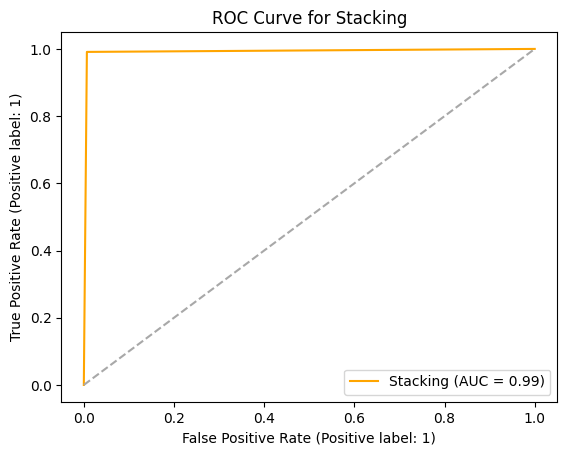

In [101]:
fig, ax = plt.subplots()
plt.title("ROC Curve for Stacking")
RocCurveDisplay.from_predictions(y_test, y_pred_test_stack, ax=ax, name=f"Stacking", color="orange")
plt.plot([0,1], [0,1], color="#A8A8A8", linestyle="--")

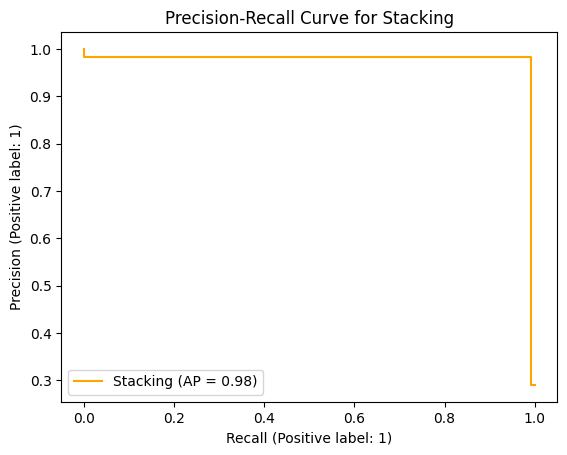

In [102]:
fig, ax = plt.subplots()
plt.title("Precision-Recall Curve for Stacking")
PrecisionRecallDisplay.from_predictions(y_test, y_pred_test_stack, ax=ax, name=f"Stacking", color="orange")

In [103]:
column_names

Index(['Age', 'Gender', 'Total Bilirubin', 'Direct Bilirubin',
       'Alkaline Phosphotase', 'Alamine Aminotransferase',
       'Aspartate Aminotransferase', 'Total Protiens', 'Albumin', 'A/G Ratio'],
      dtype='object')

In [104]:
feature_columns = list(column_names)
#categorical features
categorical_features = [feature_columns.index('Gender')]
class_names = ["Normal", "Liver Disease"]

# Explainable AI (XAI)¶

## Local Interpretable Model-agnostic Explanations (LIME)

LIME is used to interpret individual predictions, providing insights into which features contribute most to the model's decision.

In [105]:
from lime.lime_tabular import LimeTabularExplainer
explainer_lime = LimeTabularExplainer(X_train.values, 
                                 feature_names=feature_columns, 
                                 class_names=class_names,
                                 categorical_features=categorical_features, 
                                 mode='classification')

In [106]:
# instance for explanation
instance_index = 111
instance = X_test.iloc[instance_index]

# Generate and display the explanation
explanation_knn = explainer_lime.explain_instance(instance.values, best_model_stack.predict_proba, num_features=len(feature_columns))
explanation_knn.show_in_notebook()

## SHapley Additive exPlanations (SHAP)

SHAP values are calculated for the KNN model to understand the impact of each feature on the model's output. Summary and decision plots visualize the overall and individual contributions of features.

  0%|          | 0/100 [00:00<?, ?it/s]

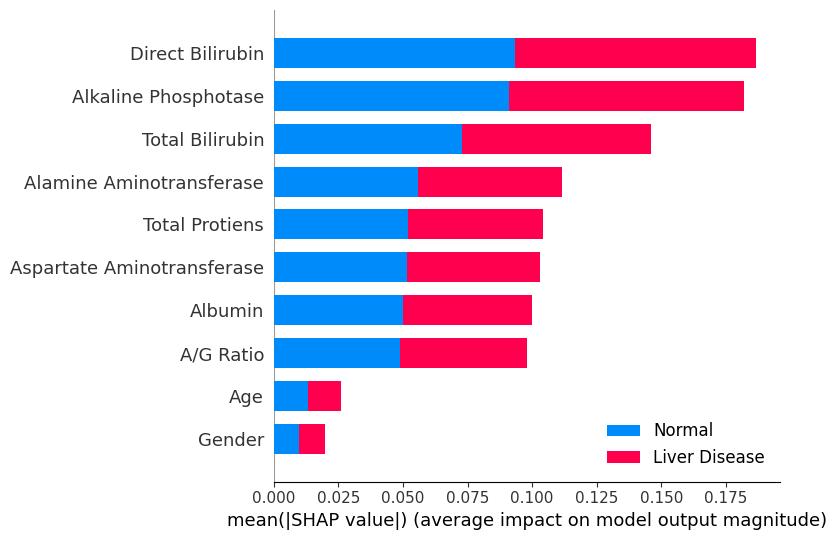

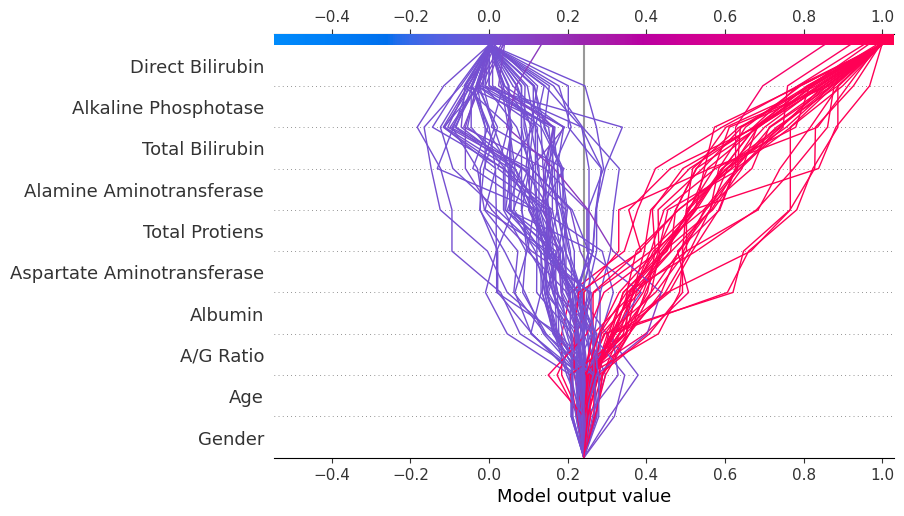

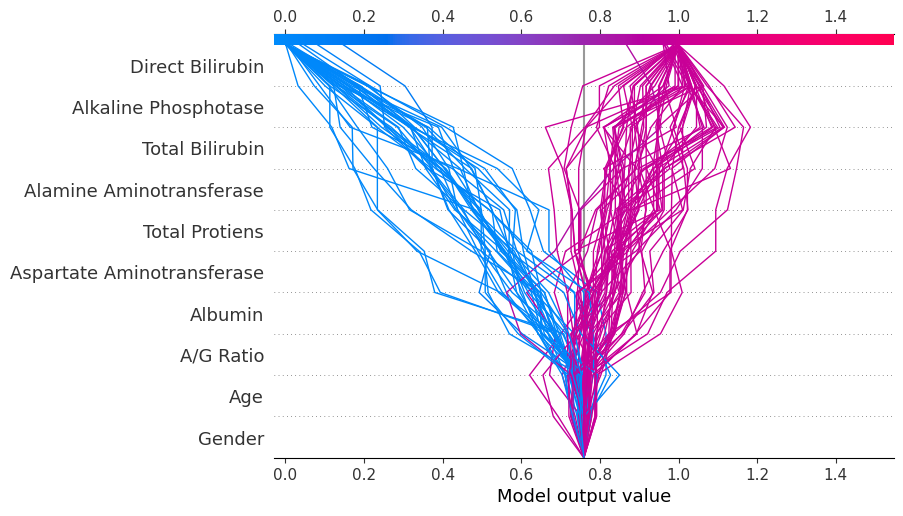

In [107]:
import shap

# Assuming 'best_model' is your trained KNN
model_to_explain = best_model_stack

# Define the prediction function for the ensemble model to work with probabilities for SHAP explanations
def ensemble_predict_proba(data):
    return model_to_explain.predict_proba(data)

# Initialize the KernelExplainer with the prediction function and a subset of the training data
explainer = shap.KernelExplainer(model=ensemble_predict_proba, data=X_train[feature_columns].iloc[:100])

# Compute SHAP values for a subset of the test data to make the computation more manageable
shap_values = explainer.shap_values(X=X_test[feature_columns].iloc[:100], nsamples=100)

# Summary plot for all classes using the feature names and class names for better interpretation
shap.summary_plot(shap_values, X_test[feature_columns].iloc[:100], feature_names=feature_columns, class_names=class_names)

# Decision plot for Liver Disease class
shap.decision_plot(base_value=explainer.expected_value[1], shap_values=shap_values[1], feature_names=feature_columns)

# Decision plot for Normal class
shap.decision_plot(base_value=explainer.expected_value[0], shap_values=shap_values[0], feature_names=feature_columns)


## Conclusion

This analysis demonstrates the efficacy of various machine learning models in predicting liver disease, underscored by the importance of preprocessing and the potential of ensemble methods to enhance prediction accuracy. The use of XAI techniques like LIME and SHAP aids in demystifying model decisions, contributing to more trustworthy and understandable AI applications in healthcare.